# Shanghai Rental Price Prediction

###### By Eden Wu, Sara Han, Jacky Xu
  
  ### 0. Importing Packages

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge

pd.set_option('max_colwidth',200)
pd.set_option('display.width',200)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',1000)
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')


### 1. Load Datas
  
  

In [2]:
train=pd.read_excel('data/train.xls')
test=pd.read_excel('data/test.xls')
test = test.loc[:, ~test.columns.str.contains('^Unnamed')]
train = train.loc[:, ~train.columns.str.contains('^Unnamed')]
print("Train shape: ", train.shape)
print("Test shape: ", test.shape)

Train shape:  (11482, 155)
Test shape:  (3828, 155)


<AxesSubplot:xlabel='Area', ylabel='Price'>

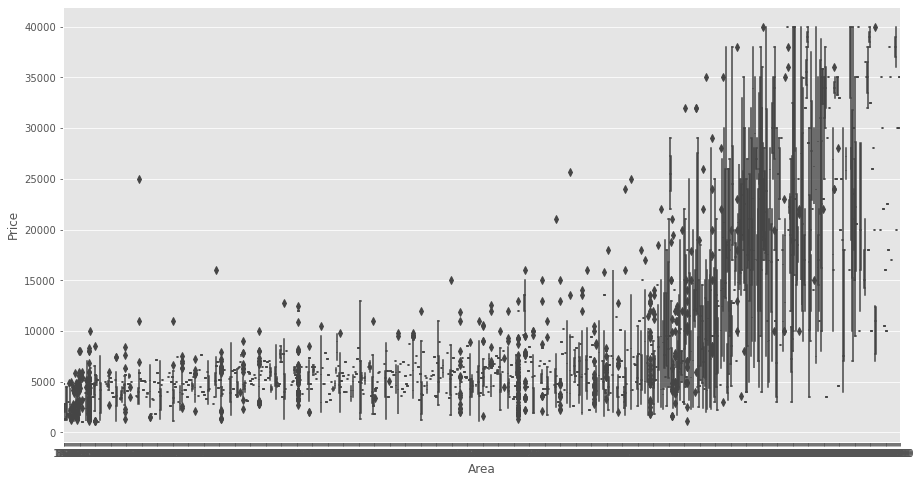

In [3]:
plt.figure(figsize=(15,8))
sns.boxplot(train["Area"], train["Price"])

### 2. Scale Variables

In [4]:
from sklearn.model_selection import train_test_split

full=pd.concat([train,test], ignore_index=True)
X = full.drop(columns = ["Price"])
y = full["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape[0]

12248

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
#scaler = RobustScaler()
scaler = StandardScaler()

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(y)

In [6]:
pd.options.display.float_format = '{:,.5f}'.format
lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled,y)
from sklearn.tree import DecisionTreeRegressor
#tree=DecisionTreeRegressor()
#tree.fit(X_scaled,y)
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=X.columns)
FI_lasso.sort_values("Feature Importance",ascending=False)
#FI_tree = pd.DataFrame({"Feature Importance":tree.feature_importances_}, index=X.columns)
#FI_tree.sort_values("Feature Importance",ascending=False)

,Feature Importance
Latitude,"6,267.29240"
Area,"6,166.64557"
8630994b7ffffff,"2,474.80855"
86309bb07ffffff,"2,240.28019"
Floor,"1,811.81259"
8630994afffffff,"1,281.19901"
864118b27ffffff,"1,196.73288"
Bedrooms,906.57220
8630994a7ffffff,842.73386
Exquisite,803.13133


### 4. Extracting Weak Features

In [7]:
X_new = X.drop(columns=FI_lasso.index[abs(FI_lasso['Feature Importance'])<200])

X_new.shape

(15310, 99)

In [8]:
#scaler = MinMaxScaler()
#scaler = RobustScaler()

scaler = StandardScaler()

X_scaled = scaler.fit(X_new).transform(X_new)
y_log = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)
test_X_scaled = scaler.transform(X_test)

### 5. Roughly Estimate

In [9]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

def mae_cv(model,X,y):
    mae = -cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=5)
    return mae

In [10]:
models = [LinearRegression(),
          Ridge(),
          Lasso(alpha=0.01,max_iter=10000),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          #SVR(),
          LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),
          #SGDRegressor(max_iter=10000,tol=1e-3),
          BayesianRidge(),
          KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor()]
names = ["LR", "Ridge", "Lasso", "RF", "GBR","LinSVR", "Ela","Bay","Ker","Extra"]

In [11]:
for name, model in zip(names, models):
    score = mae_cv(model, X_scaled, y)
    print("{}: {:.4f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 595964159230182.2500, 1180070466312896.2500
Ridge: 2228.0411, 42.4164
Lasso: 2228.0623, 42.6820
RF: 448.4570, 25.6820
GBR: 937.8071, 22.4376
LinSVR: 3605.6885, 78.7431
Ela: 2227.9835, 40.9777
Bay: 2228.1119, 40.2173
Ker: 1122.3104, 209.4148
Extra: 424.6917, 38.5188


### 6. Hyperparameters Tuning

In [12]:
from scipy.stats import randint 
from scipy.stats import uniform
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,
                                   param_grid,
                                   cv=5, 
                                   scoring="neg_mean_absolute_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, -grid_search.best_score_)
        grid_search.cv_results_['mean_test_score'] = -grid_search.cv_results_['mean_test_score']
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

class random():
    def __init__(self,model):
        self.model = model
    
    def random_get(self,X,y,param_random):
        random_search = RandomizedSearchCV(self.model, 
                                           param_random,
                                           cv=5,    
                                           n_iter=20,
                                           scoring='neg_mean_absolute_error')
        random_search.fit(X,y)
        print(random_search.best_params_, -random_search.best_score_)
        random_search.cv_results_['mean_test_score'] = -random_search.cv_results_['mean_test_score']
        print(pd.DataFrame(random_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [13]:
random(RandomForestRegressor()).random_get(X_scaled,y,{'n_estimators':randint(1,100)})

{'n_estimators': 94} 446.97482432071604
                  params  mean_test_score  std_test_score
0   {'n_estimators': 55}        448.23672        25.34039
1   {'n_estimators': 18}        466.79137        24.69760
2   {'n_estimators': 65}        451.52905        20.49008
3   {'n_estimators': 90}        447.23929        23.50293
4   {'n_estimators': 67}        447.71671        22.43580
5   {'n_estimators': 63}        452.45203        24.73321
6   {'n_estimators': 33}        455.14528        24.87598
7   {'n_estimators': 36}        454.83704        22.37415
8   {'n_estimators': 34}        451.15017        22.07104
9   {'n_estimators': 24}        455.86450        24.80124
10  {'n_estimators': 91}        448.90146        23.65672
11  {'n_estimators': 44}        451.37846        25.10936
12  {'n_estimators': 61}        449.88857        24.65569
13  {'n_estimators': 30}        457.33827        23.07993
14  {'n_estimators': 80}        448.22398        26.09818
15  {'n_estimators': 19}        

In [14]:
from sklearn.metrics import mean_absolute_error
y_mean = np.mean(y)
mean_absolute_error(y*0+y_mean,y)

7277.780453087743

In [15]:
random(GradientBoostingRegressor()).random_get(X_scaled,y,{'n_estimators':randint(1000,5000),
                                                       'subsample':uniform(0,1),
                                                       'learning_rate':[0.05,0.1]
                                                      })

{'learning_rate': 0.1, 'n_estimators': 4723, 'subsample': 0.8213269998874373} 459.0293017882167
                                                                             params  mean_test_score  std_test_score
0      {'learning_rate': 0.1, 'n_estimators': 2793, 'subsample': 0.904979903167651}        480.51132        17.08152
1    {'learning_rate': 0.1, 'n_estimators': 2490, 'subsample': 0.06520290558710473}        754.48406        16.08644
2    {'learning_rate': 0.1, 'n_estimators': 4679, 'subsample': 0.12541438791468684}        596.16793        34.26338
3    {'learning_rate': 0.05, 'n_estimators': 2207, 'subsample': 0.9332066739458764}        525.45146        10.13447
4     {'learning_rate': 0.1, 'n_estimators': 2869, 'subsample': 0.1418307953536122}        614.31579        19.42381
5    {'learning_rate': 0.1, 'n_estimators': 2584, 'subsample': 0.32695715995685015}        538.42277        16.42637
6   {'learning_rate': 0.05, 'n_estimators': 1215, 'subsample': 0.12355127050926429}  

In [16]:
random(ExtraTreesRegressor()).random_get(X_scaled,y,{'n_estimators':randint(1,100)})

{'n_estimators': 65} 422.83687546101646
                  params  mean_test_score  std_test_score
0   {'n_estimators': 76}        423.80695        38.60148
1   {'n_estimators': 14}        439.42817        38.50595
2   {'n_estimators': 32}        429.25128        38.71874
3   {'n_estimators': 27}        431.59647        36.08319
4   {'n_estimators': 64}        426.42498        38.11946
5   {'n_estimators': 10}        451.43309        38.48165
6    {'n_estimators': 8}        451.86220        33.82892
7   {'n_estimators': 17}        432.51460        38.95094
8    {'n_estimators': 6}        468.24449        43.86239
9   {'n_estimators': 54}        427.43687        38.33805
10  {'n_estimators': 65}        424.54534        37.68547
11   {'n_estimators': 7}        444.80060        42.14384
12  {'n_estimators': 74}        423.91896        40.13274
13  {'n_estimators': 95}        423.48728        37.33523
14  {'n_estimators': 12}        435.92325        41.42616
15  {'n_estimators': 64}        

In [17]:
param_rand={'alpha':uniform(0,1), 'kernel':["polynomial"], 'degree':[3],'coef0':uniform(0,1)}
random(KernelRidge()).random_get(X_scaled,y,param_rand)

{'alpha': 0.5082764214686752, 'coef0': 0.6969392838627135, 'degree': 3, 'kernel': 'polynomial'} 903.0629036391263
                                                                                                 params  mean_test_score  std_test_score
0      {'alpha': 0.24989887531986255, 'coef0': 0.5076344421799017, 'degree': 3, 'kernel': 'polynomial'}        969.50219       285.12635
1       {'alpha': 0.6523670124523996, 'coef0': 0.9626805565199005, 'degree': 3, 'kernel': 'polynomial'}        916.77155        91.74222
2   {'alpha': 0.42184508994153713, 'coef0': 0.0023712380119896848, 'degree': 3, 'kernel': 'polynomial'}      2,374.31711       331.45824
3     {'alpha': 0.11862165069196473, 'coef0': 0.33191358607719124, 'degree': 3, 'kernel': 'polynomial'}      1,232.95439       885.86441
4      {'alpha': 0.8804060774276735, 'coef0': 0.34036152946466525, 'degree': 3, 'kernel': 'polynomial'}      1,143.32234       277.83006
5       {'alpha': 0.8321026412236081, 'coef0': 0.681185167550041

### 7. Weight Average

In [18]:
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [19]:
# Getting Models
RF = RandomForestRegressor(n_estimators=80)
GBR = GradientBoostingRegressor(learning_rate=0.1, n_estimators=4382, subsample=0.757462880091466)
Extra = ExtraTreesRegressor(n_estimators=61)
Kernel = KernelRidge(alpha=0.20589529539940143, kernel="polynomial", degree=3, coef0=0.18080900055760518)

In [20]:
# Initializing Weights
w_RF = 0.3
w_GBR = 0.2
w_Extra = 0.4
w_Kernel = 0.1

In [21]:
weight_avg = AverageWeight(mod = [RF, GBR, Extra, Kernel],weight=[w_RF,w_GBR,w_Extra,w_Kernel])

In [22]:
mae_cv(weight_avg,X_scaled,y),  mae_cv(weight_avg,X_scaled,y).mean()

(array([416.62798569, 486.88353604, 433.2723679 , 449.0130142 ,
        409.74123571]),
 440.4629893663285)

### 8. Stacking

In [23]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [24]:
from sklearn.impute import SimpleImputer
a = SimpleImputer().fit_transform(X_scaled)
b = SimpleImputer().fit_transform(y.values.reshape(-1,1)).ravel()
stack_model = stacking(mod=[GBR, RF, Kernel],meta_model=Extra)
mae = mae_cv(stack_model,a,b)
print(mae)
print(mae.mean())

[435.27341615 473.51429332 471.45760536 493.57278548 465.98876546]
467.96137315582183


### 9. Validation

In [25]:
validate=pd.read_excel('data/validate.xls')
validate_y = validate["Price"]
validate_X=validate[X_new.columns]
validate_y.head()
validate_X.head()

,Area,Bedrooms,Livingrooms,Bathrooms,Floor,NextToSubway,Exquisite,OpenForVisits,Longitude,Latitude,863098207ffffff,86309820fffffff,863098217ffffff,86309821fffffff,863098227ffffff,86309822fffffff,863098237ffffff,863098247ffffff,86309824fffffff,863098257ffffff,86309825fffffff,863098267ffffff,86309826fffffff,863098277ffffff,863098287ffffff,86309828fffffff,863098297ffffff,86309829fffffff,8630982afffffff,8630982c7ffffff,8630982cfffffff,8630982d7ffffff,8630982dfffffff,8630982e7ffffff,8630982efffffff,8630982f7ffffff,863098347ffffff,86309834fffffff,863098357ffffff,86309835fffffff,86309836fffffff,863098667ffffff,86309874fffffff,863098967ffffff,863098c57ffffff,863099427ffffff,863099437ffffff,863099487ffffff,86309948fffffff,863099497ffffff,86309949fffffff,8630994a7ffffff,8630994afffffff,8630994b7ffffff,8630994c7ffffff,8630994f7ffffff,863099507ffffff,863099517ffffff,86309951fffffff,863099537ffffff,863099587ffffff,863099597ffffff,86309959fffffff,8630995a7ffffff,8630995afffffff,8630995b7ffffff,863099c27ffffff,863099c97ffffff,863099c9fffffff,86309b117ffffff,86309b147ffffff,86309b167ffffff,86309b80fffffff,86309b84fffffff,86309b857ffffff,86309b86fffffff,86309b877ffffff,86309b907ffffff,86309b917ffffff,86309b91fffffff,86309b927ffffff,86309b92fffffff,86309b937ffffff,86309b957ffffff,86309b967ffffff,86309b96fffffff,86309b977ffffff,86309ba27ffffff,86309ba2fffffff,86309bacfffffff,86309badfffffff,86309bb07ffffff,86309bb27ffffff,86309bb37ffffff,86309bb57ffffff,86309bb77ffffff,86309d68fffffff,864118b27ffffff,864189057ffffff
0,30.00000,1,0,1,7,0,0,0,121.31304,31.21158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,51.00000,1,1,1,29,0,1,0,121.45541,31.21349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60.00000,1,1,1,19,1,0,0,121.37783,31.35091,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60.00000,1,1,1,9,0,0,0,121.45541,31.21349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,118.00000,2,2,1,29,0,1,0,121.45541,31.21349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
validate_X_scaled = scaler.fit(validate_X).transform(validate_X)
c = SimpleImputer().fit_transform(validate_X_scaled)
d = SimpleImputer().fit_transform(validate_y.values.reshape(-1,1)).ravel()
mae = mae_cv(stack_model,c,d)
print(mae)

[538.65526687 686.8254505  580.90354656 523.56470588 594.90206793]


In [31]:
stack_model.fit(c,d)

[ 2800.         12000.          4378.36065574  1853.67213115
 18000.          5205.08196721 40000.          6597.21311475
  6500.          2600.        ]
0     2800
1    12000
2     4300
3     1800
4    18000
5     4760
6    40000
7     6700
8     6500
9     2600
Name: Price, dtype: int64


In [40]:
y_eg = stack_model.predict(SimpleImputer().fit_transform(validate_X_scaled))
#print(y_eg)
y_va = list(validate_y)

errors = []
error = 0
count = 0
for i in range(len(y_eg)):
    if y_eg[i] != y_va[i]:
        error += abs(y_eg[i] - y_va[i])
        count += 1
        errors.append(abs(y_eg[i] - y_va[i]))
        
error /= count
print(errors)

[78.3606557377052, 53.672131147540995, 445.0819672131147, 102.78688524590143, 1844.2622950819668, 22.62295081967204, 5.573770491803316, 873.6065573770493, 1540.9836065573763, 1245.9016393442616, 303.7704918032787, 1113.2786885245905, 1874.2622950819668, 2770.491803278688, 905.5737704918033, 148.0327868852455, 1105.5737704918033, 398.6065573770493, 329.96721311475403, 1442.6229508196702, 326.3934426229507, 9.262295081967295, 407.70491803278696, 0.1639344262296163, 53.672131147540995, 439.50819672131183, 474.9180327868853, 2577.049180327869, 552.4590163934427, 53.67213114754077, 13272.131147540984, 257.8688524590161, 203.60655737704928, 22.131147540983875, 1567.2131147540968, 5.65573770491801, 60.16393442622939, 1981.9672131147527, 1.6393442622952534, 306.7213114754095, 32.131147540983875, 5.573770491803316, 235.0819672131147, 454.42622950819714, 1058.5245901639346, 1255.7377049180323, 5.4098360655737, 10.983606557377243, 1687.0491803278692, 1041.8032786885242, 220.65573770491847, 1113.6